In [1]:

#importing packages for cleaning
import nltk
# nltk.download('stopwords')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from textblob import TextBlob
from PIL import Image

In [2]:
df = pd.read_csv('./final/final_dataset.csv', sep=';', encoding = 'iso-8859-1')

In [3]:
text = df.complaint.str.cat(sep=' ').lower()

In [7]:
#removing numbers
def remove_num(text):
    text = ''.join([i for i in text if not i.isdigit()])
    return text

#executing function
text = np.vectorize(remove_num)(text)

#removing punctuation
from string import punctuation
def remove_punct(text):
    text = ' '.join(word.strip(punctuation) for word in text.split() if word.strip(punctuation))
    return text

#executing function
text = np.vectorize(remove_punct)(text)

#removing other characters
def remove_u(text):
    text = text.replace('_','')
    text = text.replace('?','')
    text = text.replace('•','')
    text = text.replace("@",'')
    text = text.replace('▯','')
    text = text.replace("'",'')
    text = text.replace(",","")
    text = text.replace("\n","")
#     text = text.replace("máquina","maquina")
    
    return text

#executing function
text = np.vectorize(remove_u)(text)

#--------------------------------------------------------------------------------------

#removing extra spaces
def simplify_stem(text):
    text = text.replace("entrei","entrar")
    text = text.replace("maquina","máquina")

    return text

#executing function
text = np.vectorize(simplify_stem)(text)

#--------------------------------------------------------------------------------------

#--------------------------------------------------------------------------------------

#removing extra spaces
def remove_extra_space(text):
    word_list = text.split()
    text = ' '.join(word_list)
    return text

#executing function
text = np.vectorize(remove_extra_space)(text)

#--------------------------------------------------------------------------------------

#removing very common words
stop_words = nltk.corpus.stopwords.words('portuguese')
stop_words.extend(['que', 'de', 'da', 'os', 'as', 'ou', 'uma', 'reclame','aqui', 'editado', 'pag','seguro'])
stop_words.extend(['pois', 'porque', 'agora', 'sendo', 'porém', 'assim', 'então', 'apenas', 'onde', 'pq', 'mesma', 'vc', 'mim', 'ja', 'nao', 'porem'])

def remove_stopwords(text):
    word_list = text.split()
    word_list = [word for word in word_list if word not in stop_words]
    text = ' '.join(word_list)
    return text

#executing function
text = np.vectorize(remove_stopwords)(text)
text = text.tolist()

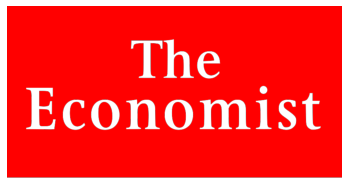

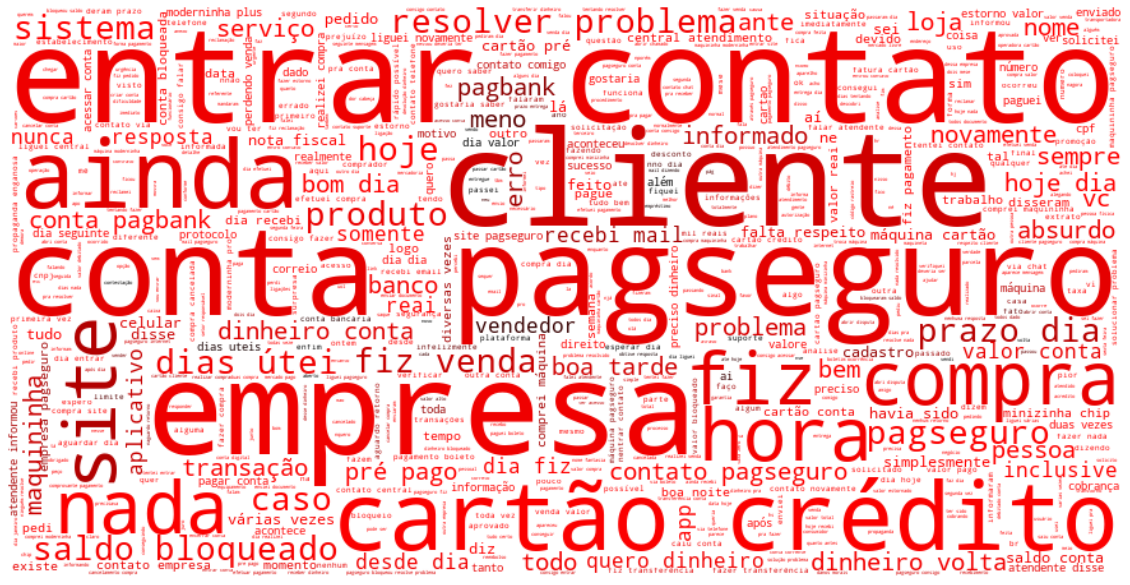

In [8]:
#setting mask image
mask = np.array(Image.open(r'./final/economist.png'))
plt.imshow(mask)
plt.axis("off")

# lower max_font_size, change the maximum number of word and lighten the background:
from wordcloud import ImageColorGenerator

#--------------------------------------------------------------------------------------

#creating wordcloud
wordcloud = WordCloud(mask=mask, width=2000, height=1000,contour_color="black", max_words=10000,relative_scaling = 0, background_color = "white").generate(text)
image_colors = ImageColorGenerator(mask)
plt.figure(figsize=[20,15])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")
_=plt.show()

In [9]:
wordcloud.words_

{'entrar contato': 1.0,
 'cliente': 0.5863889996014349,
 'empresa': 0.5591869270625748,
 'conta pagseguro': 0.42955360701474693,
 'cartão crédito': 0.4267636508569151,
 'ainda': 0.34416102032682344,
 'fiz compra': 0.30858907931446794,
 'nada': 0.2986249501793543,
 'hora': 0.28816261458748504,
 'site': 0.2810880829015544,
 'resolver problema': 0.27431247508967715,
 'dias útei': 0.2601634117178159,
 'caso': 0.23893981666002392,
 'saldo bloqueado': 0.21990833001195695,
 'pagseguro': 0.21383021123953766,
 'fiz venda': 0.21024312475089676,
 'prazo dia': 0.20715424471901156,
 'hoje': 0.20356715823037067,
 'produto': 0.18772419290554004,
 'sistema': 0.1864288561179753,
 'contato pagseguro': 0.1842367477082503,
 'dinheiro volta': 0.18403746512554803,
 'conta pagbank': 0.1764647269828617,
 'dinheiro conta': 0.1753686727779992,
 'serviço': 0.1750697489039458,
 'problema': 0.17317656436827422,
 'sempre': 0.17018732562774014,
 'hoje dia': 0.16749701076125947,
 'banco': 0.16660023913909924,
 'boa t